In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from collections import OrderedDict
from torch import nn
from torch import optim
from utils import *
from sklearn.metrics import mean_squared_error
from torch import tensor
import copy
import torch
from tqdm import tqdm

%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
X_train, X_test, y_train, y_test = (scaledTrainTestSplit(loadData(quant=True, unSkew=True)))

carat:0.020450070764268666
carat: 0.020450070764268666: boxcox
depth: No Change


PLEASE WORK 0.5993289324435086
x: No Change
y: 0.3636482008742052: Sqrt
z: 0.0139742634447758: Sqrt


/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [64]:
model = MLPRegressor(hidden_layer_sizes=[9,100,100,100],
                     activation='relu',
                     solver='adam',
                     alpha=0.1,
                     learning_rate_init=0.001,
                     batch_size=200,
                     learning_rate='invscaling',
                     momentum=0.9,
                     early_stopping=True,
                     validation_fraction=0.1)

Train RMSE: 569.9912106990598, Test RMSE: 604.7681696548783


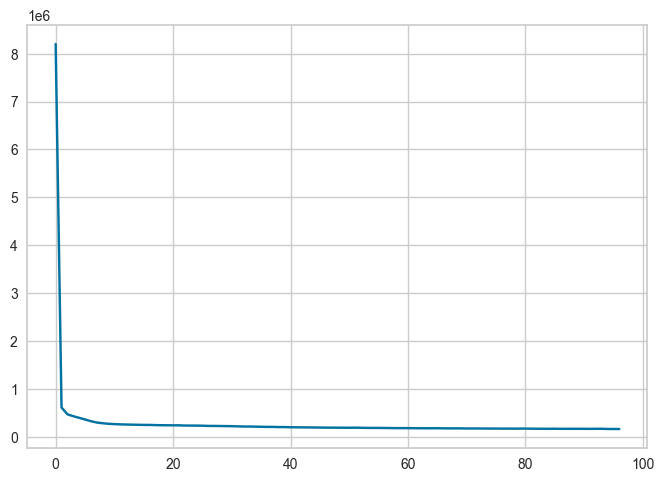

In [6]:
model.fit(X_train,y_train)
trainPred = model.predict(X_train)
testPred = model.predict(X_test)
trainrmse = mean_squared_error(trainPred, y_train, squared=False)
testrmse = mean_squared_error(testPred, y_test, squared=False)
print(f"Train RMSE: {trainrmse}, Test RMSE: {testrmse}")
plt.plot(model.loss_curve_)
model.

In [66]:
X_train, X_test, y_train, y_test = (scaledTrainTestSplit(loadData(quant=True, unSkew=True)))
X_train = torch.FloatTensor(X_train.to_numpy())
y_train = torch.FloatTensor(y_train.to_numpy())
X_test = torch.FloatTensor(X_test.to_numpy())
y_test = torch.FloatTensor(y_test.to_numpy())

carat:0.020450070764268666
carat: 0.020450070764268666: boxcox
depth: No Change


PLEASE WORK 0.5993289324435086
x: No Change
y: 0.3636482008742052: Sqrt
z: 0.0139742634447758: Sqrt


/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [68]:
model = nn.Sequential(OrderedDict([
    ('dense1', nn.Linear(9, 100)),
    ('act1', nn.ReLU()),
    # ('drop1',nn.Dropout(0.1)),
    ('dense2', nn.Linear(100, 100)),
    ('act2', nn.ReLU()),
    ('dense3', nn.Linear(100, 100)),
    ('drop2',nn.Dropout(0.1)),
    ('act3', nn.ReLU()),
    ('output', nn.Linear(100, 1)),
]))
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

In [71]:
model = nn.Sequential(
    nn.Linear(9, 100),
    nn.ReLU(),
    nn.Linear(100, 200),
    nn.ReLU(),
    nn.Linear(200, 100),
    nn.ReLU(),
    nn.Linear(100, 1)
)
 
# loss function and optimizer
loss_fn = nn.MSELoss()  # mean square error
optimizer = optim.Adam(model.parameters(), lr=0.1)
# optimizer = optim.NMS(model.parameters(), lr=0.1, momentum=0.9)
 
n_epochs = 40   # number of epochs to run
batch_size = 200  # size of each batch
batch_start = torch.arange(0, len(X_train), batch_size)
 
# Hold the best model
best_mse = np.inf   # init to infinity
best_weights = None
history = []
 
for epoch in range(n_epochs):
    model.train()
    with tqdm(batch_start, unit="batch", mininterval=0, disable=False) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())
 
# restore model and return best accuracy
model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

AttributeError: module 'torch.optim' has no attribute 'NMS'